Entender o reflorestamento no brasil de 2006 a 2016

In [233]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import SGDRegressor



Importando o csv

In [235]:
florestas_plantadas= pd.read_csv('/content/drive/MyDrive/rf_florestasplantadas_iba_2006-2016.csv', encoding='utf-8', sep = ';', index_col=0)

Inspecionando o DataFrame (Desmatamento de Biomas por Estados)

In [236]:
type(florestas_plantadas)

pandas.core.frame.DataFrame

In [237]:
florestas_plantadas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 31/12/2006 to 31/12/2016
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Cultura    366 non-null    object 
 1   Espécie    366 non-null    object 
 2   Estado     366 non-null    object 
 3   Área (ha)  365 non-null    float64
dtypes: float64(1), object(3)
memory usage: 14.3+ KB


In [238]:
florestas_plantadas.shape

(366, 4)

In [239]:
florestas_plantadas.columns

Index(['Cultura', 'Espécie', 'Estado', 'Área (ha)'], dtype='object')

In [240]:
florestas_plantadas.head()

,Cultura,Espécie,Estado,Área (ha)
Ano,,,,
31/12/2006,Eucalipto,Eucalipto,Minas Gerais,1181429.0
31/12/2006,Eucalipto,Eucalipto,São Paulo,915841.0
31/12/2006,Eucalipto,Eucalipto,Mato Grosso do Sul,119319.0
31/12/2006,Eucalipto,Eucalipto,Bahia,540172.0
31/12/2006,Eucalipto,Eucalipto,Rio Grande do Sul,184245.0


In [241]:
florestas_plantadas.tail()

,Cultura,Espécie,Estado,Área (ha)
Ano,,,,
31/12/2016,Outras culturas,Teca,Não informado,87502.0
31/12/2016,Outras culturas,Paricá,Não informado,90047.0
31/12/2016,Outras culturas,Araucária,Não informado,11114.0
31/12/2016,Outras culturas,Pópulus,Não informado,4216.0
31/12/2016,Outras culturas,Outras,Não informado,6641.0


In [242]:
florestas_plantadas.sort_index()

,Cultura,Espécie,Estado,Área (ha)
Ano,,,,
31/12/2006,Eucalipto,Eucalipto,Minas Gerais,1181429.0
31/12/2006,Pinus,Pinus,Amapá,20490.0
31/12/2006,Pinus,Pinus,Tocantins,3647.0
31/12/2006,Pinus,Pinus,Espírito Santo,4408.0
31/12/2006,Pinus,Pinus,Bahia,54820.0
...,...,...,...,...
31/12/2016,Pinus,Pinus,Bahia,3301.0
31/12/2016,Pinus,Pinus,Espírito Santo,2500.0
31/12/2016,Pinus,Pinus,Tocantins,200.0


Manipulando o DataFrame

####################################

Separando por Area Desmatada

In [243]:
florestas_plantadas.columns

Index(['Cultura', 'Espécie', 'Estado', 'Área (ha)'], dtype='object')

In [244]:
area_plantada = florestas_plantadas['Área (ha)']


In [245]:
area_plantada.head().sort_index()

Ano
31/12/2006    1181429.0
31/12/2006     915841.0
31/12/2006     119319.0
31/12/2006     540172.0
31/12/2006     184245.0
Name: Área (ha), dtype: float64

Separando por Periodo

In [246]:
cultura_plantio = florestas_plantadas['Cultura']

In [247]:
florestas_plantadas.head().sort_index()

,Cultura,Espécie,Estado,Área (ha)
Ano,,,,
31/12/2006,Eucalipto,Eucalipto,Minas Gerais,1181429.0
31/12/2006,Eucalipto,Eucalipto,São Paulo,915841.0
31/12/2006,Eucalipto,Eucalipto,Mato Grosso do Sul,119319.0
31/12/2006,Eucalipto,Eucalipto,Bahia,540172.0
31/12/2006,Eucalipto,Eucalipto,Rio Grande do Sul,184245.0


####################################################

Usando Groupby

bioma

In [248]:
ano_groupby = florestas_plantadas.groupby(by='Ano').head()

In [249]:
ano_groupby.head()

,Cultura,Espécie,Estado,Área (ha)
Ano,,,,
31/12/2006,Eucalipto,Eucalipto,Minas Gerais,1181429.0
31/12/2006,Eucalipto,Eucalipto,São Paulo,915841.0
31/12/2006,Eucalipto,Eucalipto,Mato Grosso do Sul,119319.0
31/12/2006,Eucalipto,Eucalipto,Bahia,540172.0
31/12/2006,Eucalipto,Eucalipto,Rio Grande do Sul,184245.0


Estado

In [250]:
estado_groupby = florestas_plantadas.groupby(by='Estado').head()

In [251]:
estado_groupby.head()

,Cultura,Espécie,Estado,Área (ha)
Ano,,,,
31/12/2006,Eucalipto,Eucalipto,Minas Gerais,1181429.0
31/12/2006,Eucalipto,Eucalipto,São Paulo,915841.0
31/12/2006,Eucalipto,Eucalipto,Mato Grosso do Sul,119319.0
31/12/2006,Eucalipto,Eucalipto,Bahia,540172.0
31/12/2006,Eucalipto,Eucalipto,Rio Grande do Sul,184245.0


In [252]:
estado_groupby.min()

Cultura      Eucalipto
Espécie         Acácia
Estado           Amapá
Área (ha)            7
dtype: object

In [253]:
estado_groupby.max()

Cultura          Pinus
Espécie           Teca
Estado       Tocantins
Área (ha)      1.3e+06
dtype: object

Area Plantada


In [254]:
area_plantada_groupby_max = florestas_plantadas.groupby(by='Área (ha)').head()

Insights de Dados

maior desmatamento por estado

In [255]:
area_plantada = florestas_plantadas['Área (ha)'].values.reshape((-1, 1))

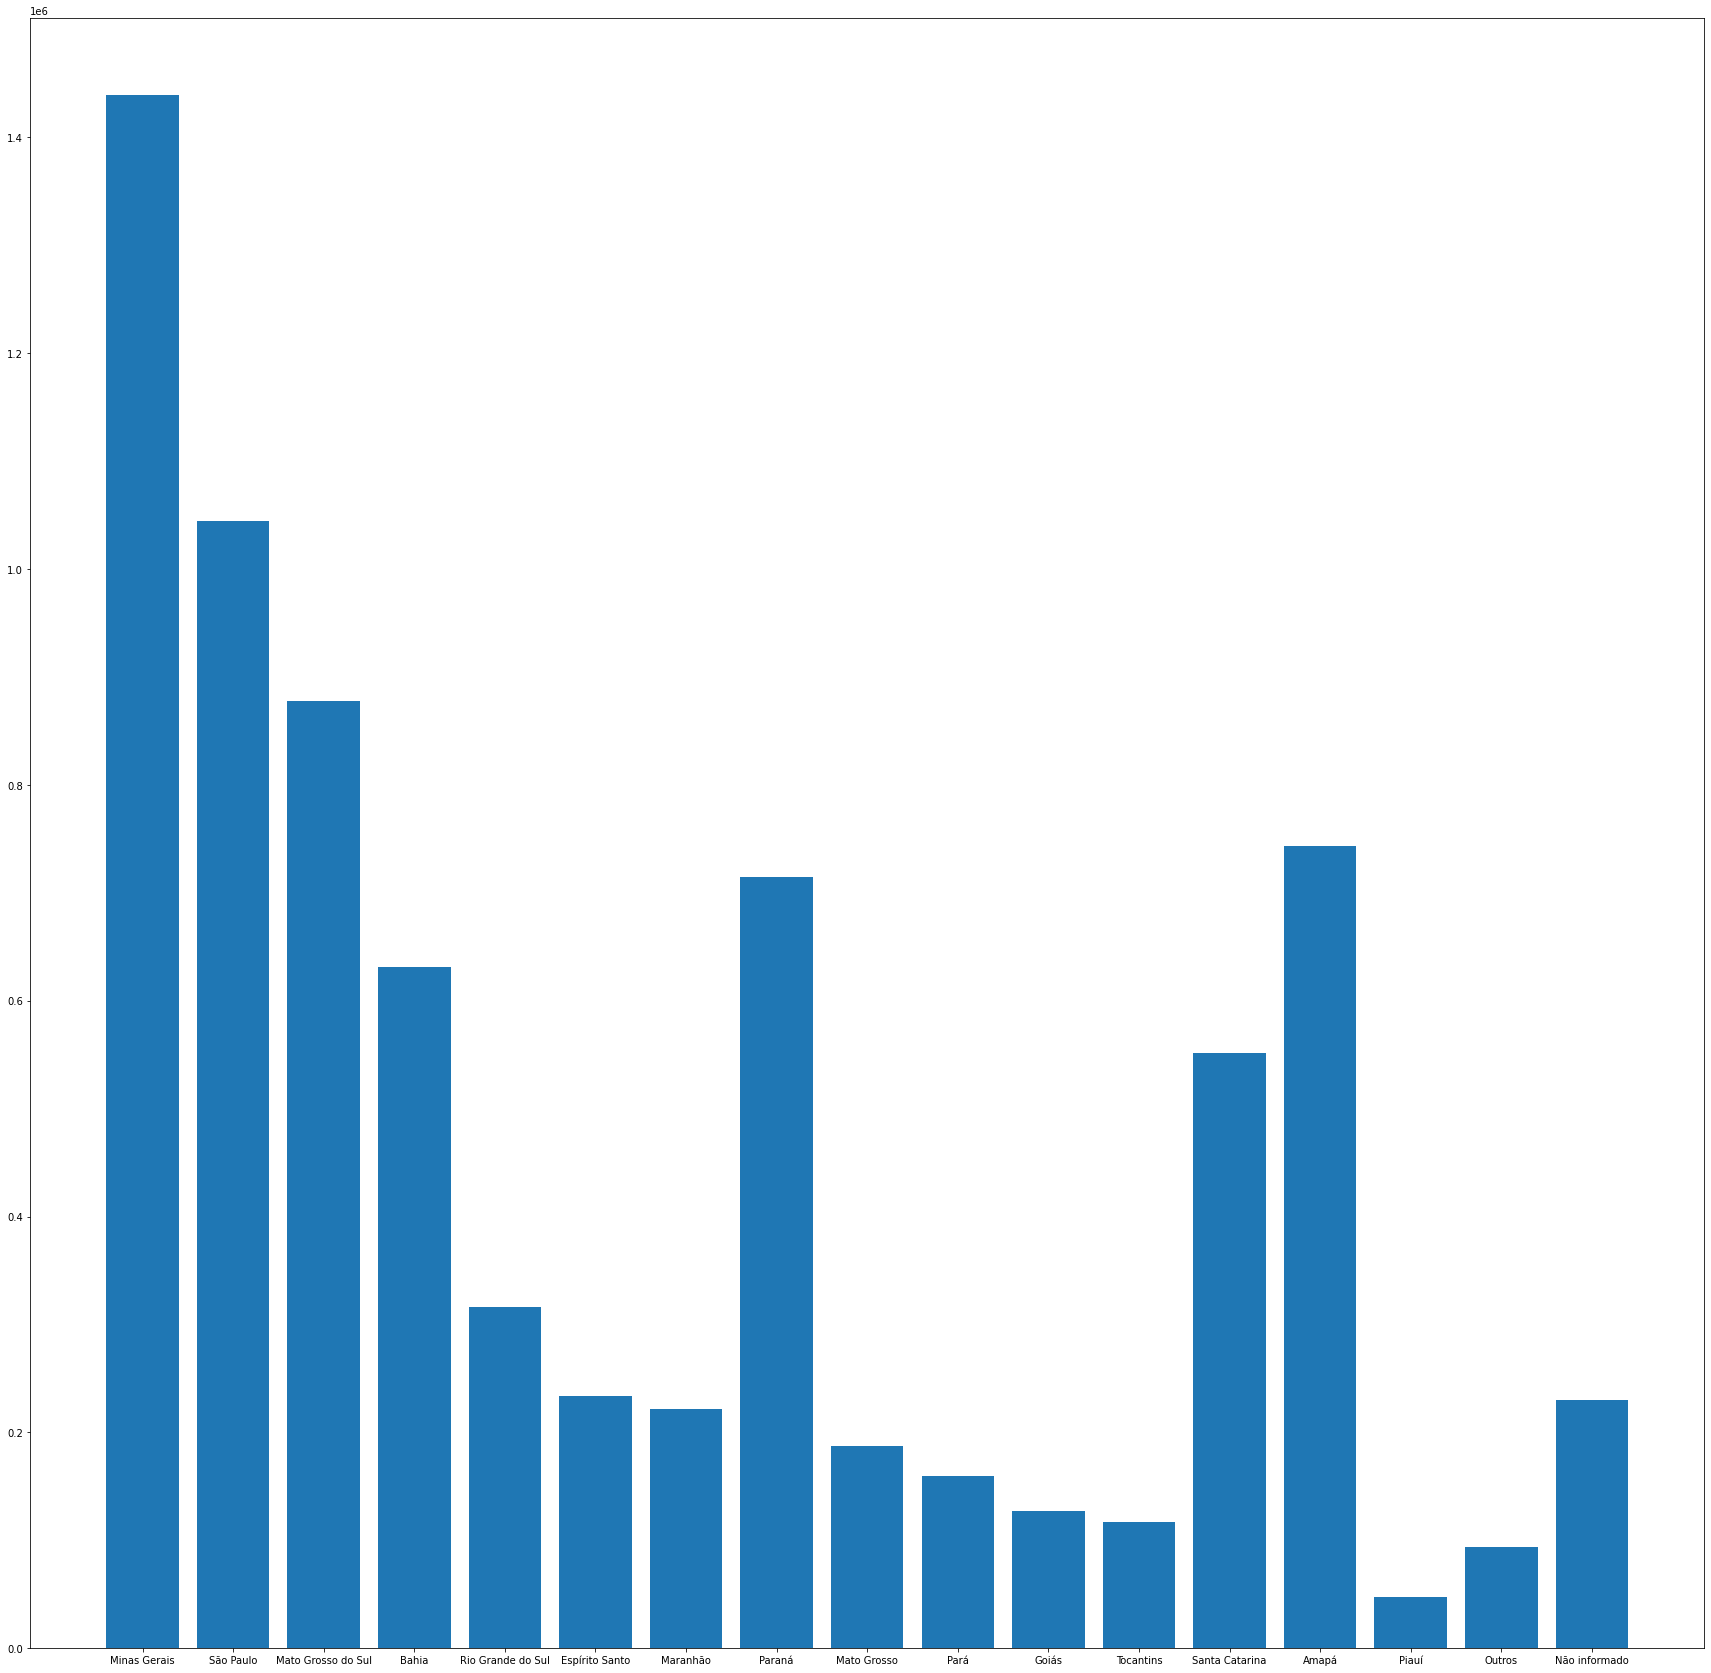

In [256]:

area_grouped = florestas_plantadas['Estado']
estado_grouped = florestas_plantadas['Área (ha)']
 
plt.bar(area_grouped,estado_grouped)
plt.rcParams["figure.figsize"] = [30, 30]
 
 
plt.show()

Conjuntos de Treino e Testes

In [257]:
from sklearn.model_selection import train_test_split
x = area_plantada.astype('int64')
y = area_plantada.astype('int64')
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)
clf = SGDRegressor(loss='squared_loss',
                   learning_rate='constant',
                   max_iter=10,
                   eta0=0.01,
                   verbose=1,
                   tol=None,
                   random_state=123)

Treinando estimador


In [258]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Testando estimador

In [260]:
# Regressor
y_pred = clf.predict(x_test)
sk.metrics.r2_score(y_test, y_pred)

0.999999999527077

In [262]:
clf.score(x_test, y_test)

0.999999999527077